<a href="https://colab.research.google.com/github/jaisingkute9/Demo-project/blob/main/23062023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df.shape

(768, 9)

In [67]:
x = df.drop(columns = ["Outcome"],axis =1)

y = df["Outcome"]

In [68]:
x.shape

(768, 8)

In [69]:
# splitting the dataset in train test split

x_train, x_test, y_train, y_test = train_test_split(
                                                x,
                                                y,
                                                train_size = 0.8,
                                                random_state = 42
)

In [70]:
x_train.shape

(614, 8)

In [71]:
# scaling is required in case of ANN model in order to avoid the domination effect of
# bigger values on smaller values

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns= x_train.columns)

x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [72]:
display(x_train_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [73]:
display(x_test_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
1,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
2,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
3,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
4,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
149,1.588046,1.379144,1.004713,-1.322774,-0.701206,-0.204722,-0.496677,1.400099
150,-0.828460,-1.370087,-0.725249,0.622575,-0.219029,0.170230,2.322925,-0.774936
151,1.285983,-0.807744,0.139732,-1.322774,-0.701206,0.622758,0.047040,2.096111
152,-0.526397,0.785560,0.031609,1.141335,2.398498,-0.515028,-0.392688,-0.339929


In [74]:
# creating the instance of model

model = tf.keras.Sequential(name = "Main_container")

#adding the input layer to model

model.add(tf.keras.layers.Input(shape=[8],name = "Input_layer"))

# adding the dense layer to  model

model.add(tf.keras.layers.Dense(units = 9,activation = "elu",kernel_initializer = "he_normal",name = "hidden_layer_1"))

# adding the 2nd hidden layer to model

model.add(tf.keras.layers.Dense(units = 8,activation = "elu",kernel_initializer = "he_uniform",name = "hidden_layer_2"))

# adding the 3rd hidden layer to model

model.add(tf.keras.layers.Dense(units = 4,activation = "elu",kernel_initializer = "he_normal",name = "hidden_layer_3"))

#creating output layer

model.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid",kernel_initializer = "he_uniform",name = "output_layer"))

In [75]:
model.layers[3].get_weights()

[array([[-1.1830012 ],
        [-0.5763199 ],
        [ 0.6159215 ],
        [ 0.92303884]], dtype=float32),
 array([0.], dtype=float32)]

In [76]:
model.summary()

Model: "Main_container"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 9)                 81        
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 80        
                                                                 
 hidden_layer_3 (Dense)      (None, 4)                 36        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


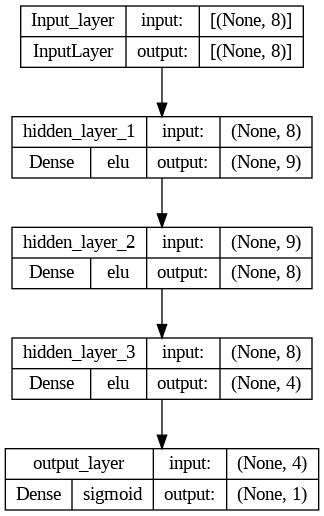

In [77]:
plot_model(
    model,
    show_shapes = True,
    show_layer_names=True,
    show_layer_activations =True
)

In [78]:
# once the archiotecture is created we will add functionality to model

model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [79]:
! pip install ann_visualizer
! pip install graphviz


In [80]:
from ann_visualizer.visualize import ann_viz

In [81]:
ann_viz(model)

In [82]:
# Now er are feeding the data to model

history = model.fit(
                  x_train_scaled,
                  y_train,
                  verbose=True,
                  batch_size=16,
                  validation_split = 0.2,
                  epochs = 100,
                  workers=10,
                  use_multiprocessing = True
)

Epoch 1/100
31/31 [==============================] - 3s 28ms/step - loss: 0.8769 - accuracy: 0.4053 - val_loss: 0.7524 - val_accuracy: 0.5610
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.7416 - accuracy: 0.5336 - val_loss: 0.6659 - val_accuracy: 0.6260
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6586 - accuracy: 0.6151 - val_loss: 0.6127 - val_accuracy: 0.6585
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.6782 - val_loss: 0.5789 - val_accuracy: 0.7236
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.7088 - val_loss: 0.5580 - val_accuracy: 0.7398
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7393 - val_loss: 0.5427 - val_accuracy: 0.7317
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5366 - accuracy: 0.7475 - val_loss: 0.5296 - val_accuracy: 0.7317
Epoch 8/100


In [83]:
#100   80 20 80 20% train 64 val 16 test 20

In [84]:
# these all logs are stored in dictionary

history.history

{'loss': [0.8768667578697205,
  0.7416026592254639,
  0.6585935950279236,
  0.6066253781318665,
  0.5735160112380981,
  0.5516104698181152,
  0.5365645885467529,
  0.5234464406967163,
  0.5146598219871521,
  0.5072900652885437,
  0.5012934803962708,
  0.49604204297065735,
  0.4924374520778656,
  0.4891834259033203,
  0.48521745204925537,
  0.48171550035476685,
  0.4791083037853241,
  0.4773857593536377,
  0.4743174612522125,
  0.4718133509159088,
  0.46990177035331726,
  0.4686456620693207,
  0.4663871228694916,
  0.46482041478157043,
  0.4639889597892761,
  0.46217063069343567,
  0.46046730875968933,
  0.45809873938560486,
  0.4574008285999298,
  0.4573620557785034,
  0.4550969898700714,
  0.4530196189880371,
  0.4516203999519348,
  0.45041102170944214,
  0.44992271065711975,
  0.44856128096580505,
  0.4472930133342743,
  0.4465819299221039,
  0.446343332529068,
  0.4448395371437073,
  0.4429467022418976,
  0.44263020157814026,
  0.44145986437797546,
  0.4402845799922943,
  0.44054698

In [85]:
# we can even plot accuracy and loss against each epoch

def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("model "+keyword)
  plt.ylabel(keyword)
  plt.xlabel("epoch")

  plt.legend(["training data","validation data"])




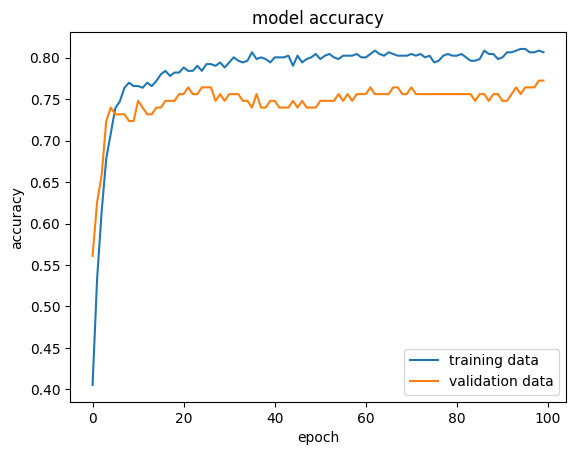

In [86]:
plotting(history,"accuracy")

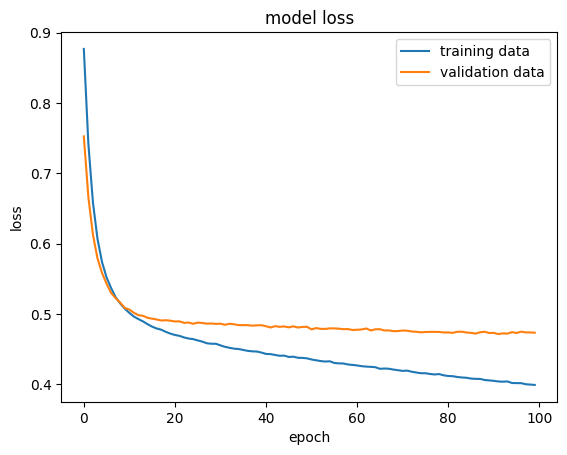

In [87]:
plotting(history,"loss")

In [88]:
# predicting the values on test dataset

y_logs = model.predict(x_test_scaled)

y_pred = np.where(y_logs>0.5,1,0)

y_pred[:10]

5/5 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [89]:
# printing the accuracy on testing data

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)

print("accuracy on testing data is : ",acc)

accuracy on testing data is :  0.7012987012987013


In [90]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
input_data = (6,148,72,35,0,33.6,0.627,50)

# converting the data into array
input_data = np.asarray(input_data)

#we need to reshape the data in order to pass in one instance
input_data_reshape = input_data.reshape(1,-1)

# we need to scaled the data on basis of standard scaler
x_test_scaling = scaler.transform(input_data_reshape)

# predicting the output
prediction = model.predict(x_test_scaling)

# as this prediction is given by sigmoid we need to convert it into 0 and 1
y_pred = np.where(prediction>0.5,1,0)

if y_pred[0][0]==1:
  print("the person is suffering from diabetes".upper())

else:
  print("the person is not suffering from diabetes".upper())

1/1 [==============================] - 0s 63ms/step
THE PERSON IS SUFFERING FROM DIABETES


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
weights_dir = 'Weights'
os.makedirs(weights_dir, exist_ok = True)

In [94]:
# Saving the model
model.save(os.path.join(weights_dir,'best_model.tf'), save_format = 'tf')

In [94]:
/content/Weights/best_model.tf

In [95]:
import shutil

In [96]:
shutil.copy("/content/Weights/best_model.tf","/content/drive/MyDrive")

IsADirectoryError: ignored

In [ ]:
pip install pyngrok

In [ ]:
pip install protobuf==3.20.*

In [ ]:
#docker run -it python:3.10 /bin/bash
# Within the Docker container:
!pip3 install google-cloud-logging==3.1.1 protobuf==4.21.0
!python3 -c "import google.cloud.logging"

In [ ]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [ ]:
pip install --upgrade "protobuf<=3.20.1"

In [ ]:
!pip install 'protobuf<=3.20.1' --force-reinstall

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501